**Group 21 Course 2B Assigment**

*   Muhammad Fikri Kafilli
*   Adrian Mulianto
*   Ndidiamaka okpala
*   Hamid Khan
*   Della Putri Wahyuni
*   Mochamad Rizky Farhan Auliya


Exploring the data Sales involves a step-by-step process:

1. Check and prepare data to clean and handling missing values and ensuring consistency.
2. Summaries the data with statistical analysis: Use descriptive statistics with aggregation function (i.e sum, count, average, min, max) for searching meaningful information such as: top product sales, total amount, average amount, etc
3. Use Statistical methods to identify significant correlation/comparative/distribution/trending between variables from the data
4. Visualize the data with charts and graphs to see patterns and relationships (min.3 graph)
5. Use related python library to handle all of tasks
6. Upload your source code with python extension file such as .py or .ipynb and file .rawgraphs (if you visualized the data using rawgraphs)
7. Tomorrow some of you will present the result of your assignment

# First Steps (importing all requirement)

Import all library you need

In [ ]:
import pandas as pd #
import numpy as np #
import matplotlib.pyplot as plt #
import seaborn as sns #

Import dataset
This code run with google colab so using this path as default. Change if needed

In [ ]:
dataset_path = "/content/orderdataset.csv"
order_test_df = pd.read_csv(dataset_path)

test. If path working you can see the table

In [ ]:
order_test_df.head()

,order_id;quantity;product_id;price;seller_id;freight_value;customer_id;order_status;purchase_date;payment_type;product_category_name;product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047;2;f293394c72c...
1,2e7a8482f6fb09756ca50c10d7bfc047;1;c1488892604...
2,e5fa5a7210941f7d56d0208e4e071d35;1;f3c2d01a84c...
3,3b697a20d9e427646d92567910af6d57;1;3ae08df6bcb...
4,71303d7e93b399f5bcd537d124c0bcfa;1;d2998d7ced1...


as we can see here data is not normal format for csv (because is not separated by comma but with semicolon so we need to change that). We have 2 option (as far as we know)

1.   Just use sep=";" argument on pd.read_csv() so pandas will read semicolon just like read using comma (what we doing here is this) or,
2.   Convert first using to_csv() and just use new csv with comma as separator for code.



In [ ]:
order_df = pd.read_csv(dataset_path, sep=";")

In [ ]:
order_df.head()

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,05/09/2016,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,03/10/2016,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,03/10/2016,e-wallet,fashion,500.0


As now we can see here, we can read the table like normal table. Now we move to next step

# Data Cleaning

## Check data for cleaning

In [ ]:
# check how much data in here
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   freight_value          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-null  object 
 10  product_category_name  49999 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


As we can see here we have missing data. On product_weight_gram is just 49980 so missing like 19 data. Now we check for data duplication, we can clean that later.

In [ ]:
print("Sum duplicate data : ", order_df.duplicated().sum())

Sum duplicate data :  0


We don't have any data is duplicated. So next is checking anomaly on data (like wierd input)

In [ ]:
order_df.describe()

,quantity,price,freight_value,product_weight_gram
count,49999.000000,4.999900e+04,49999.000000,49980.000000
mean,1.197484,2.607784e+06,104521.390428,2201.830892
std,0.722262,1.388312e+06,55179.844962,3929.896875
min,1.000000,2.000000e+05,9000.000000,50.000000
25%,1.000000,1.410500e+06,57000.000000,300.000000
50%,1.000000,2.610000e+06,104000.000000,800.000000
75%,1.000000,3.810000e+06,152000.000000,1850.000000
max,21.000000,5.000000e+06,200000.000000,40425.000000


Nothing wierd in here

## Cleaning data missing

Because we have 19 data missing we can check now what missing

In [ ]:
order_df[order_df.product_weight_gram.isna()]

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
1193,85f8ad45e067abd694b627859fa57453,1,09ff539a621711667c43eba6a3bd8466,2899000,8b8cfc8305aa441e4239358c9f6f2485,45000,1d088dea8732788ec35dd4ee6dd76112,delivered,30/01/2017,credit card,sports,NaN
5624,eb855beb3ac99461f7a076b4c3652472,1,5eb564652db742ff8f28759cd8d2652a,772000,4e922959ae960d389249c378d1c939f5,48000,c91289ce43149a8ea5560d446f1d1dd2,delivered,23/03/2017,e-wallet,sports,NaN
6284,a2456e7f02197951664897a94c87242d,1,5eb564652db742ff8f28759cd8d2652a,2079000,4e922959ae960d389249c378d1c939f5,160000,7317f41f2cf650174af819cdb68284f0,delivered,30/03/2017,e-wallet,fashion,NaN
6312,e3daea0200104991cb979c2fcc509ae7,1,5eb564652db742ff8f28759cd8d2652a,1379000,4e922959ae960d389249c378d1c939f5,179000,4730251e8934a542a009d77dfd027375,delivered,30/03/2017,debit card,automotive,NaN
6433,6f497c40431d5fb0cfbd6c943dd29215,1,5eb564652db742ff8f28759cd8d2652a,3591000,4e922959ae960d389249c378d1c939f5,87000,5beb36d1757aa17a044222a7d79b9820,delivered,01/04/2017,credit card,gadget,NaN
6480,1521c6bb7b1028154c8c67cf80fa809f,1,5eb564652db742ff8f28759cd8d2652a,1425000,4e922959ae960d389249c378d1c939f5,89000,ca29b2bf57243228e98eab2dab805ae9,delivered,02/04/2017,debit card,sports,NaN
6499,415cfaaaa8cea49f934470548797fed1,2,5eb564652db742ff8f28759cd8d2652a,4788000,4e922959ae960d389249c378d1c939f5,67000,a8dff6357fea30071032ff2091d16430,delivered,02/04/2017,e-wallet,automotive,NaN
6500,415cfaaaa8cea49f934470548797fed1,1,5eb564652db742ff8f28759cd8d2652a,1069000,4e922959ae960d389249c378d1c939f5,36000,a8dff6357fea30071032ff2091d16430,delivered,02/04/2017,virtual account,beauty,NaN
6555,101157d4fae1c9fb74a00a5dee265c25,1,5eb564652db742ff8f28759cd8d2652a,2841000,4e922959ae960d389249c378d1c939f5,111000,f72b2f8d9295ef93fd40a4c49f67a42b,delivered,03/04/2017,virtual account,beauty,NaN
7046,c1424efcde3c9e9febd9e1761667789e,1,5eb564652db742ff8f28759cd8d2652a,368000,4e922959ae960d389249c378d1c939f5,150000,8a80133b8ace6b21415367a131a75a26,delivered,07/04/2017,debit card,sports,NaN


We have some option to clean it

1.   We can just drop all NaN data and do all that without NaN data
2.   We can use some smart guess (using value we have) for filling NaN data we have.





### Trying smart guess

We can try using some smart guess. We have product_id in here. If product_id who have NaN value is same as product_id with value on product_weight_gram we can just cross reference and fill NaN value. We need to check first if we have another duplicate product_id

In [ ]:
product_ids_with_nan = order_df[order_df.product_weight_gram.isna()]['product_id'].unique()
print(product_ids_with_nan)

['09ff539a621711667c43eba6a3bd8466' '5eb564652db742ff8f28759cd8d2652a']


In [ ]:
order_df[order_df['product_id'] == '09ff539a621711667c43eba6a3bd8466']

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
1193,85f8ad45e067abd694b627859fa57453,1,09ff539a621711667c43eba6a3bd8466,2899000,8b8cfc8305aa441e4239358c9f6f2485,45000,1d088dea8732788ec35dd4ee6dd76112,delivered,30/01/2017,credit card,sports,NaN


In [ ]:
order_df[order_df['product_id'] == '5eb564652db742ff8f28759cd8d2652a']

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
5624,eb855beb3ac99461f7a076b4c3652472,1,5eb564652db742ff8f28759cd8d2652a,772000,4e922959ae960d389249c378d1c939f5,48000,c91289ce43149a8ea5560d446f1d1dd2,delivered,23/03/2017,e-wallet,sports,NaN
6284,a2456e7f02197951664897a94c87242d,1,5eb564652db742ff8f28759cd8d2652a,2079000,4e922959ae960d389249c378d1c939f5,160000,7317f41f2cf650174af819cdb68284f0,delivered,30/03/2017,e-wallet,fashion,NaN
6312,e3daea0200104991cb979c2fcc509ae7,1,5eb564652db742ff8f28759cd8d2652a,1379000,4e922959ae960d389249c378d1c939f5,179000,4730251e8934a542a009d77dfd027375,delivered,30/03/2017,debit card,automotive,NaN
6433,6f497c40431d5fb0cfbd6c943dd29215,1,5eb564652db742ff8f28759cd8d2652a,3591000,4e922959ae960d389249c378d1c939f5,87000,5beb36d1757aa17a044222a7d79b9820,delivered,01/04/2017,credit card,gadget,NaN
6480,1521c6bb7b1028154c8c67cf80fa809f,1,5eb564652db742ff8f28759cd8d2652a,1425000,4e922959ae960d389249c378d1c939f5,89000,ca29b2bf57243228e98eab2dab805ae9,delivered,02/04/2017,debit card,sports,NaN
6499,415cfaaaa8cea49f934470548797fed1,2,5eb564652db742ff8f28759cd8d2652a,4788000,4e922959ae960d389249c378d1c939f5,67000,a8dff6357fea30071032ff2091d16430,delivered,02/04/2017,e-wallet,automotive,NaN
6500,415cfaaaa8cea49f934470548797fed1,1,5eb564652db742ff8f28759cd8d2652a,1069000,4e922959ae960d389249c378d1c939f5,36000,a8dff6357fea30071032ff2091d16430,delivered,02/04/2017,virtual account,beauty,NaN
6555,101157d4fae1c9fb74a00a5dee265c25,1,5eb564652db742ff8f28759cd8d2652a,2841000,4e922959ae960d389249c378d1c939f5,111000,f72b2f8d9295ef93fd40a4c49f67a42b,delivered,03/04/2017,virtual account,beauty,NaN
7046,c1424efcde3c9e9febd9e1761667789e,1,5eb564652db742ff8f28759cd8d2652a,368000,4e922959ae960d389249c378d1c939f5,150000,8a80133b8ace6b21415367a131a75a26,delivered,07/04/2017,debit card,sports,NaN
8452,ddf16d77e858a32f36e10c289a28ef61,1,5eb564652db742ff8f28759cd8d2652a,4580000,4e922959ae960d389249c378d1c939f5,104000,84cc013dd1790fdafb0fa598695cf3c3,delivered,24/04/2017,debit card,utilities,NaN


as we can check we have 2 product_id who have NaN value and that 2 product_id is unique only for NaN value so we can just simply drop NaN value because we cannot check what item in there

### Just drop the table

In [ ]:
order_df.dropna(subset=['product_weight_gram'], inplace=True)

Check data if still have data missing

In [ ]:
order_df.isna().sum()

order_id                 0
quantity                 0
product_id               0
price                    0
seller_id                0
freight_value            0
customer_id              0
order_status             0
purchase_date            0
payment_type             0
product_category_name    0
product_weight_gram      0
dtype: int64

We don't have any data missing anymore

# Explanitory Data Analysis (EDA)

In [ ]:
order_df.describe(include="all")

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
count,49980,49980.000000,49980,4.998000e+04,49980,49980.000000,49980,49980,49980,49980,49980,49980.000000
unique,42678,NaN,16864,NaN,1777,NaN,42678,7,356,4,8,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,99a4788cb24856965c36a24e339b6058,NaN,4a3ca9315b744ce9f8e9374361493884,NaN,fc3d1daec319d62d49bfb5e1f83123e9,delivered,24/11/2017,virtual account,toys,NaN
freq,21,NaN,366,NaN,1236,NaN,21,48645,1015,12579,6373,NaN
mean,NaN,1.197519,NaN,2.607874e+06,NaN,104518.707483,NaN,NaN,NaN,NaN,NaN,2201.830892
std,NaN,0.722372,NaN,1.388282e+06,NaN,55180.931697,NaN,NaN,NaN,NaN,NaN,3929.896875
min,NaN,1.000000,NaN,2.000000e+05,NaN,9000.000000,NaN,NaN,NaN,NaN,NaN,50.000000
25%,NaN,1.000000,NaN,1.411000e+06,NaN,57000.000000,NaN,NaN,NaN,NaN,NaN,300.000000
50%,NaN,1.000000,NaN,2.610000e+06,NaN,104000.000000,NaN,NaN,NaN,NaN,NaN,800.000000
75%,NaN,1.000000,NaN,3.810000e+06,NaN,152000.000000,NaN,NaN,NaN,NaN,NaN,1850.000000


Check for how much sales base on category

In [ ]:
order_df.groupby(by="product_category_name").agg({
  "order_id": "nunique",
  "quantity" : "sum",
  "price": "sum"
})

,order_id,quantity,price
product_category_name,,,
automotive,6152,7501,16487385000
beauty,6069,7448,16266276000
electronics,6124,7536,16248217000
fashion,6101,7484,16427270000
gadget,6071,7390,16055437000
sports,6013,7406,16214246000
toys,6204,7703,16599763000
utilities,5956,7384,16042937000


As we can see automotive category bringing the most revenue with 16.487.385.000 but for most item sold by quantity or order we have toys category at 7703 item sold and 6204 item order.

Checking how much is freight value based on product category

In [ ]:
order_df.groupby(by="product_category_name").agg({
  "order_id": "nunique",
  "freight_value" : ["sum", "mean"],
  "price": "sum"
})

order_id freight_value                       price
                       nunique           sum           mean          sum
product_category_name                                                   
automotive                6152     658598000  104805.537874  16487385000
beauty                    6069     644499000  103583.895853  16266276000
electronics               6124     658224000  104513.178787  16248217000
fashion                   6101     653698000  104224.808673  16427270000
gadget                    6071     649926000  104540.131896  16055437000
sports                    6013     649377000  104958.299661  16214246000
toys                      6204     662482000  103951.357289  16599763000
utilities                 5956     647041000  105604.863718  16042937000

In [ ]:
order_df.groupby(by="payment_type").agg({
  "order_id": "nunique",
  "freight_value" : ["sum", "mean"],
  "price": "sum"
})

order_id freight_value                       price
                 nunique           sum           mean          sum
payment_type                                                      
credit card        11931    1311094000  104954.691002  32488486000
debit card         11833    1301381000  104402.807862  32558733000
e-wallet           11831    1293860000  103974.606236  32338692000
virtual account    11997    1317510000  104738.850465  32955620000

In [ ]:
order_df.groupby(by="product_category_name").agg({
  "order_id": "nunique",
  "price": ["min", "max", "mean", "std"]
})

order_id   price                                     
                       nunique     min      max          mean           std
product_category_name                                                      
automotive                6152  200000  4999000  2.623709e+06  1.371808e+06
beauty                    6069  200000  5000000  2.614316e+06  1.393697e+06
electronics               6124  200000  4999000  2.579901e+06  1.387807e+06
fashion                   6101  201000  5000000  2.619144e+06  1.389720e+06
gadget                    6071  200000  5000000  2.582506e+06  1.397384e+06
sports                    6013  204000  4999000  2.620696e+06  1.387633e+06
toys                      6204  201000  4999000  2.604702e+06  1.394932e+06
utilities                 5956  201000  4999000  2.618400e+06  1.383042e+06

In [ ]:
# Analisis Deskriptif
min_value = order_df['quantity'].min()
max_value = order_df['quantity'].max()
range_value = max_value - min_value
mean_value = order_df['quantity'].mean()
median_value = order_df['quantity'].median()
variance_value = order_df['quantity'].var()
std_dev_value = order_df['quantity'].std()

In [ ]:
print(f"The minimum quantity is {min_value}")
print(f"The maximum quantity is {max_value}")
print(f"The range of quantity is {range_value}")
print(f"The mean quantity is {mean_value:.2f}")
print(f"The median quantity is {median_value}")
print(f"The variance of quantity is {variance_value:.2f}")
print(f"The standard deviation of quantity is {std_dev_value:.2f}")

The minimum quantity is 1
The maximum quantity is 21
The range of quantity is 20
The mean quantity is 1.20
The median quantity is 1.0
The variance of quantity is 0.52
The standard deviation of quantity is 0.72


In [ ]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49980 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49980 non-null  object 
 1   quantity               49980 non-null  int64  
 2   product_id             49980 non-null  object 
 3   price                  49980 non-null  int64  
 4   seller_id              49980 non-null  object 
 5   freight_value          49980 non-null  int64  
 6   customer_id            49980 non-null  object 
 7   order_status           49980 non-null  object 
 8   purchase_date          49980 non-null  object 
 9   payment_type           49980 non-null  object 
 10  product_category_name  49980 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 5.0+ MB


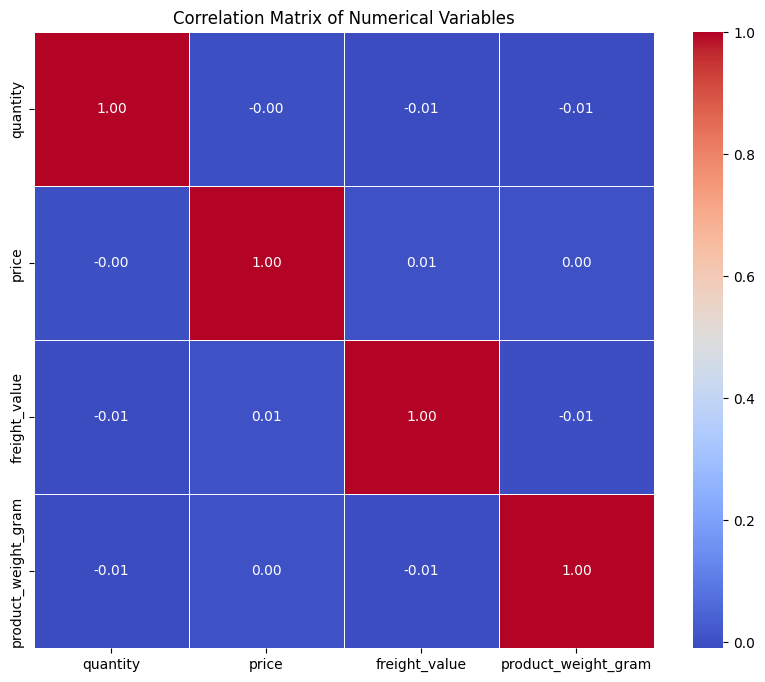

In [ ]:
# Selecting numerical columns for correlation analysis
numerical_cols = ['quantity', 'price', 'freight_value', 'product_weight_gram']

# Calculate correlation matrix
correlation_matrix = order_df[numerical_cols].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


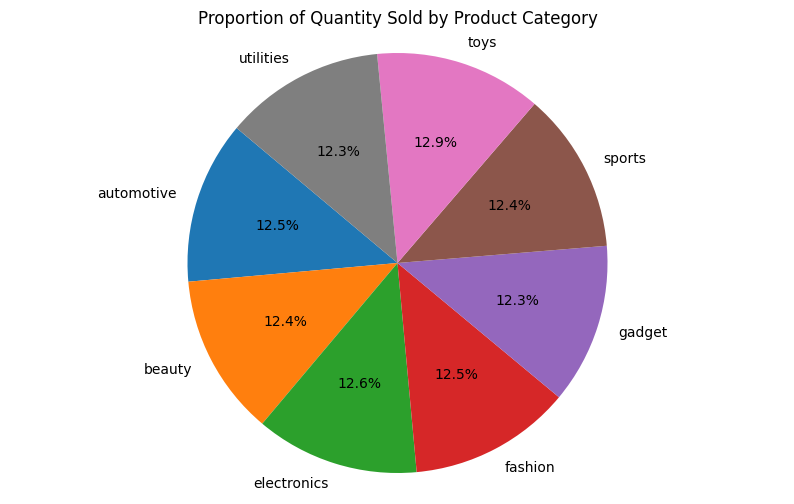

In [ ]:
# Group data based on product_category_name and sum the total quantity.
category_sales = order_df.groupby('product_category_name')['quantity'].sum().reset_index()

# Setting up data for pie charts
labels = category_sales['product_category_name']
sizes = category_sales['quantity']

# Creating pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Quantity Sold by Product Category')
plt.axis('equal')  # Making sure the pie chart circle is circular
plt.show()

    purchase_date  quantity
0      2016-09-05         4
1      2016-10-03         3
2      2016-10-04        48
3      2016-10-05        88
4      2016-10-06        94
..            ...       ...
351    2017-12-11       301
352    2017-12-12       350
353    2017-12-13       453
354    2017-12-14       256
355    2017-12-15       213

[356 rows x 2 columns]


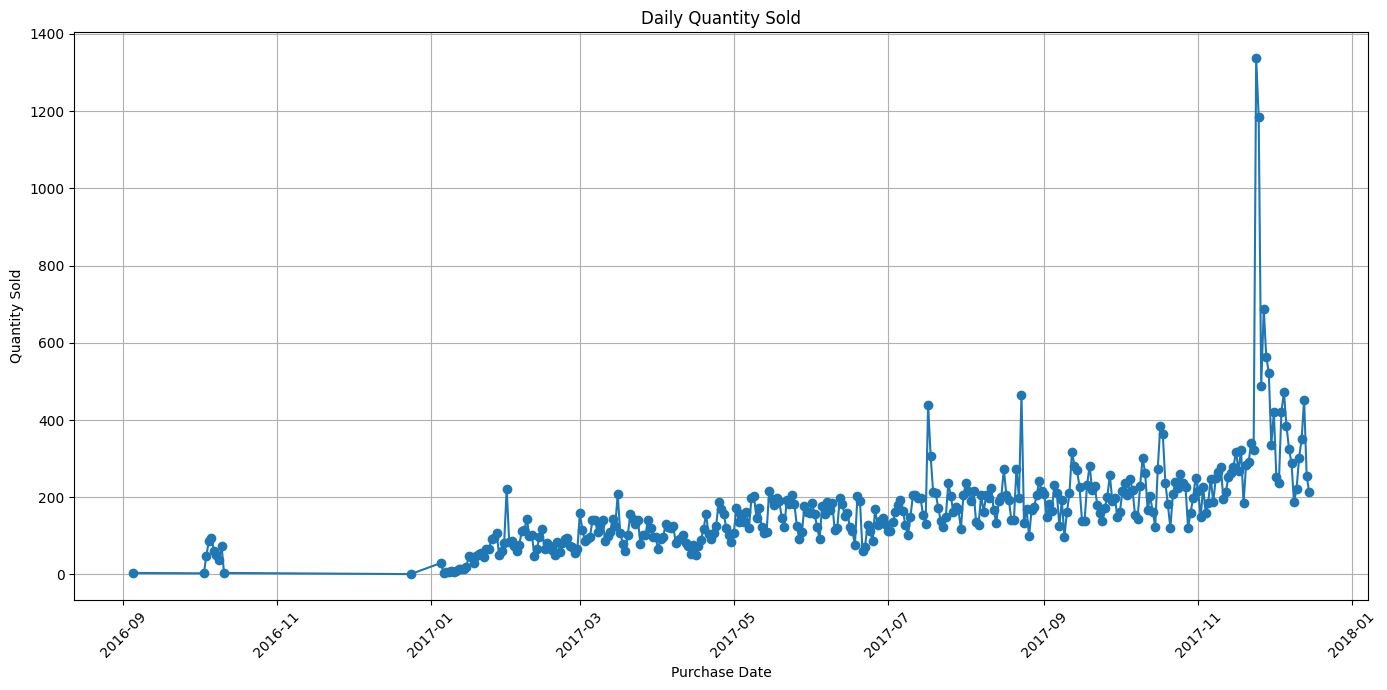

In [ ]:
# DISPLAYS THE NUMBER OF ITEMS SOLD BY DATE

# Convert the purchase_date column to datetime type
order_df['purchase_date'] = pd.to_datetime(order_df['purchase_date'], dayfirst=True)

# Group data by date and sum the quantity column
daily_sales = order_df.groupby('purchase_date')['quantity'].sum().reset_index()

# Display results in table form
print(daily_sales)

# Display results in graph form
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['purchase_date'], daily_sales['quantity'], marker='o')
plt.title('Daily Quantity Sold')
plt.xlabel('Purchase Date')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

   year_month  total_price
0     2016-09      6441000
1     2016-10   1165801000
2     2016-12      1933000
3     2017-01   3324216000
4     2017-02   5839541000
5     2017-03   9430561000
6     2017-04   8184311000
7     2017-05  12728546000
8     2017-06  11059603000
9     2017-07  14468454000
10    2017-08  16100162000
11    2017-09  15459515000
12    2017-10  17529684000
13    2017-11  28159515000
14    2017-12  12542526000


<ipython-input-26-09f2e803389c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year_month', y='total_price', data=monthly_sales, palette='viridis')


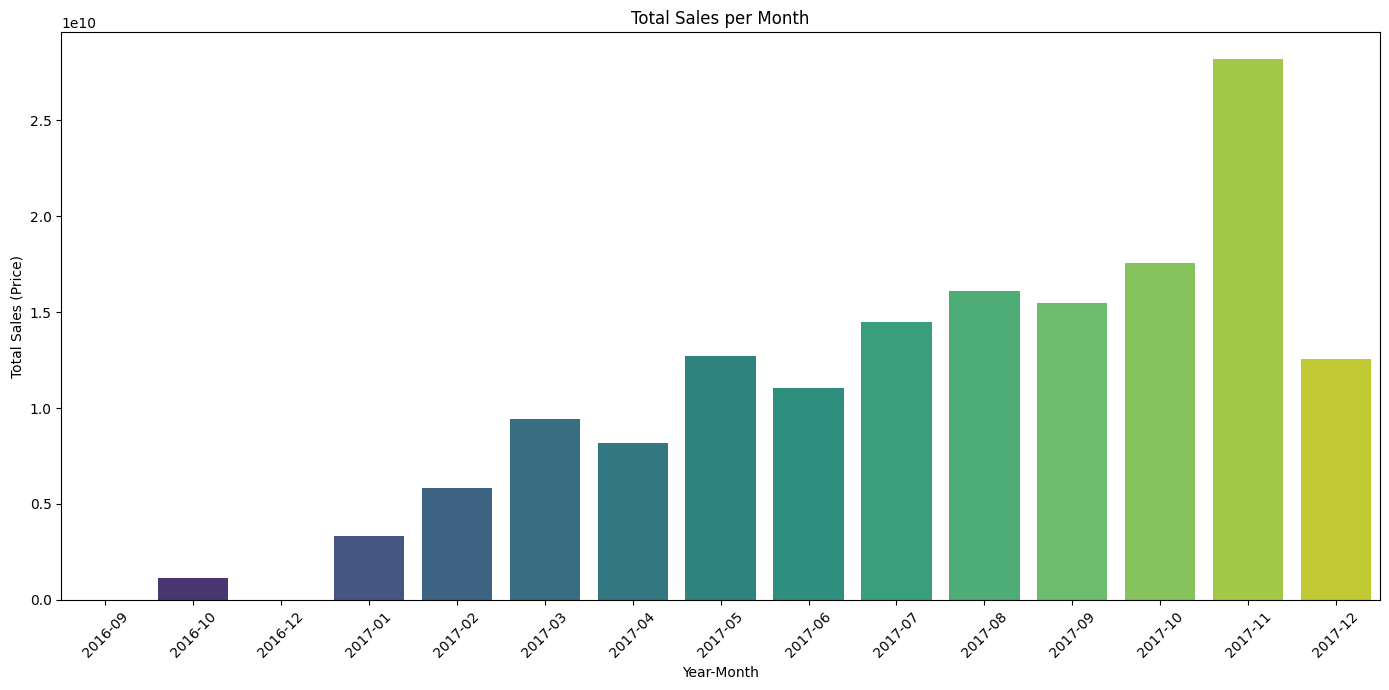

In [ ]:
# merge data by month and display the total price (price * quantity) using a bar plot every month

# Convert the purchase_date column to datetime type
order_df['purchase_date'] = pd.to_datetime(order_df['purchase_date'], dayfirst=True)

# Extract the year and month from the purchase_date field
order_df['year_month'] = order_df['purchase_date'].dt.to_period('M')

# Create a new column containing the total price (price * quantity)
order_df['total_price'] = order_df['price'] * order_df['quantity']

# Group the data by year and month, then add up the total prices.
monthly_sales = order_df.groupby('year_month')['total_price'].sum().reset_index()

# Display results in table form
print(monthly_sales)

# Display results in the form of a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='year_month', y='total_price', data=monthly_sales, palette='viridis')
plt.title('Total Sales per Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales (Price)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

   year_month  product_weight_gram
0     2016-09               3900.0
1     2016-10             853441.0
2     2016-12                200.0
3     2017-01            2036806.0
4     2017-02            4932868.0
5     2017-03            6985268.0
6     2017-04            6302606.0
7     2017-05            9570772.0
8     2017-06            8382626.0
9     2017-07           11046762.0
10    2017-08           11038839.0
11    2017-09           10795306.0
12    2017-10           11201773.0
13    2017-11           18442770.0
14    2017-12            8453571.0


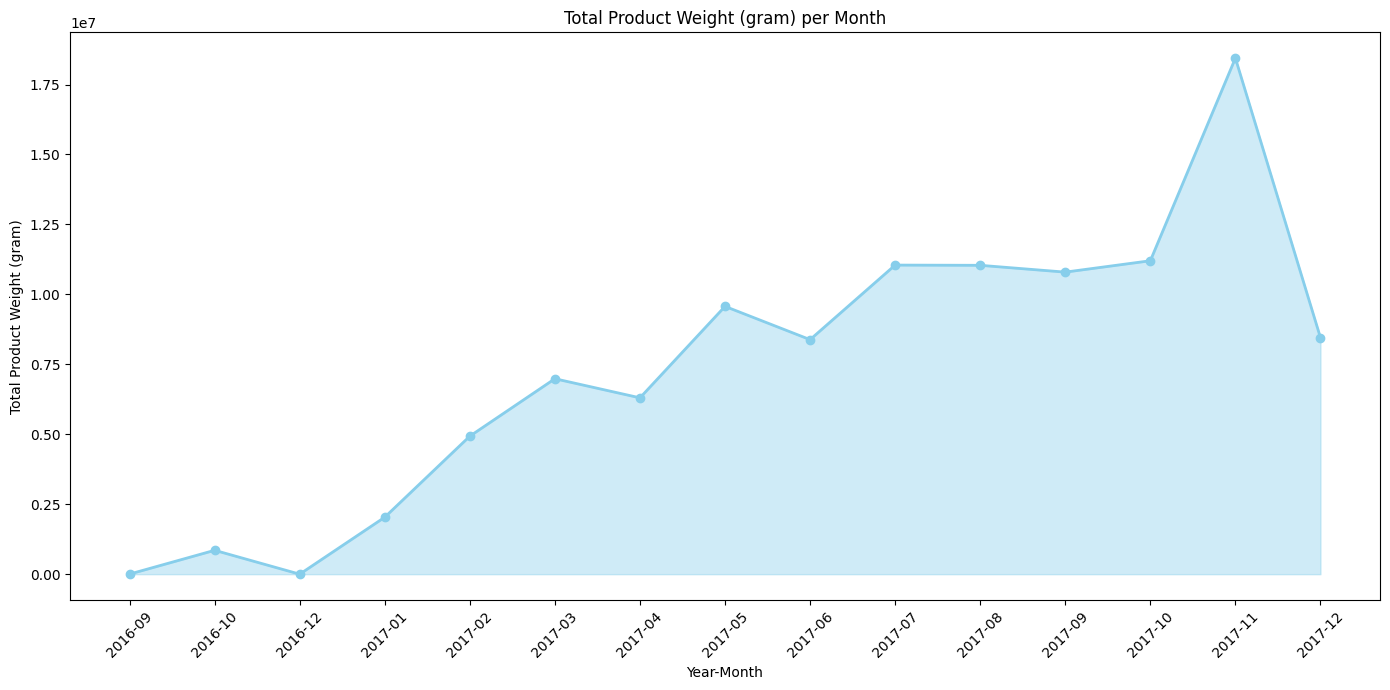

In [ ]:
# Convert the purchase_date column to datetime type
order_df['purchase_date'] = pd.to_datetime(order_df['purchase_date'], dayfirst=True)

# Extract the year and month from the purchase_date field
order_df['year_month'] = order_df['purchase_date'].dt.to_period('M')

# Group the data by year and month, then sum the product_weight_grams
monthly_weight = order_df.groupby('year_month')['product_weight_gram'].sum().reset_index()

# Display results in table form
print(monthly_weight)

plt.figure(figsize=(14, 7))
plt.fill_between(monthly_weight['year_month'].astype(str), monthly_weight['product_weight_gram'], color="skyblue", alpha=0.4)
plt.plot(monthly_weight['year_month'].astype(str), monthly_weight['product_weight_gram'], marker='o', color='skyblue', linewidth=2)
plt.title('Total Product Weight (gram) per Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Product Weight (gram)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# We will calculate the total revenue for each month and see the trend

## only take the data where it is not canceled or unavailable. The assumption is the product are succesfully purchased if it is not canceled or unavaliable

In [ ]:
df_approved = order_df[(order_df['order_status'] != 'canceled') & (order_df['order_status'] != 'unavailable')].copy()

In [ ]:
df_approved['price'] = pd.to_numeric(df_approved['price'], errors='coerce')
df_approved['quantity'] = pd.to_numeric(df_approved['quantity'], errors='coerce')

df_approved['total_amount'] = df_approved['price'] * df_approved['quantity']

In [ ]:
category_sales = df_approved.groupby('product_category_name')['quantity'].sum().reset_index()
category_sales = category_sales.rename(columns={'quantity': 'total_quantity_sold'})
most_sold_category = category_sales.sort_values(by='total_quantity_sold', ascending=False).head(8)
print("Most sold product category:\n", most_sold_category)

Most sold product category:
   product_category_name  total_quantity_sold
6                  toys                 7656
2           electronics                 7485
0            automotive                 7457
3               fashion                 7444
1                beauty                 7379
5                sports                 7360
7             utilities                 7351
4                gadget                 7348


In [ ]:
product_sales = df_approved.groupby('product_id')['total_amount'].sum().reset_index()
product_sales = product_sales.rename(columns={'total_amount': 'total_sales_amount'})
category_revenue = order_df.groupby('product_category_name')['total_amount'].sum().reset_index()
category_revenue = category_revenue.rename(columns={'total_amount': 'total_revenue'})
most_revenue_category = category_revenue.sort_values(by='total_revenue', ascending=False).head(8)
print("Product category with the most revenue:\n", most_revenue_category)

Product category with the most revenue:
   product_category_name  total_revenue
6                  toys    20025317000
0            automotive    19742594000
3               fashion    19536522000
2           electronics    19473699000
5                sports    19419582000
1                beauty    19397852000
7             utilities    19343346000
4                gadget    19061897000


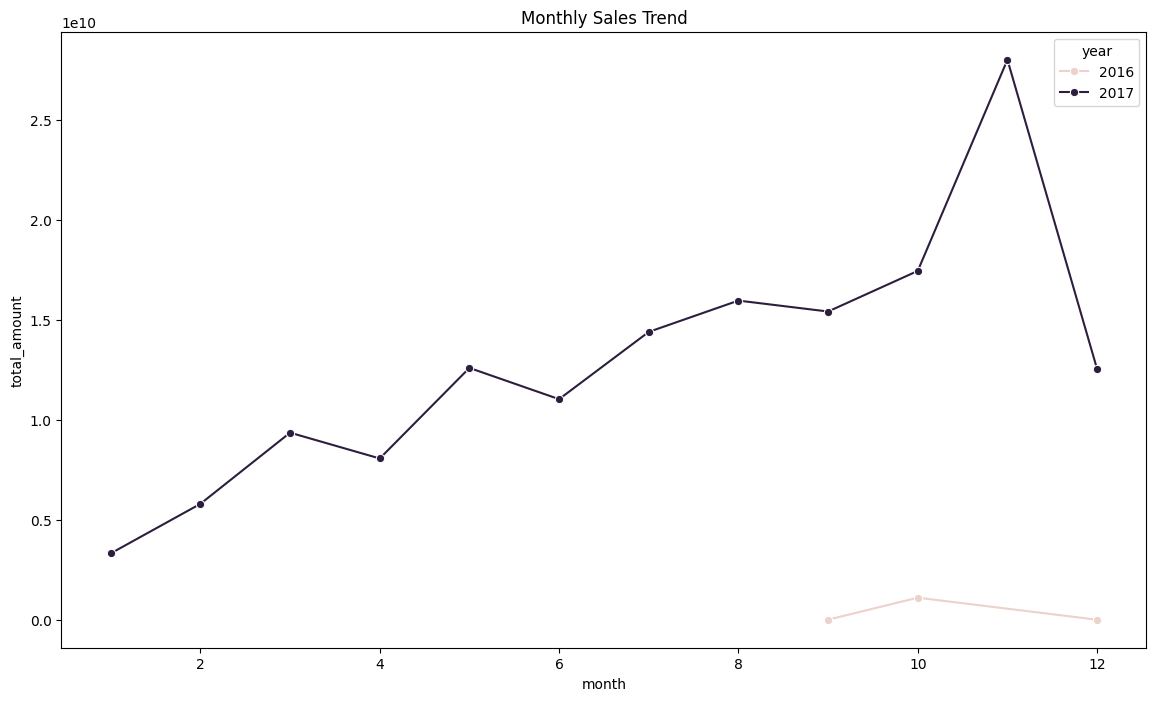

In [ ]:
df_approved['purchase_date'] = pd.to_datetime(df_approved['purchase_date'], format='%d/%m/%Y')
df_approved['year'] = df_approved['purchase_date'].dt.year
df_approved['month'] = df_approved['purchase_date'].dt.month

monthly_sales = df_approved.groupby(['year', 'month'])['total_amount'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales, x='month', y='total_amount', hue='year', marker='o')
plt.title('Monthly Sales Trend')
plt.show()